<h1>Болсунбеков Акылбек WIN 1-21</h1>
<h3>Лабораторная работа №6
Оценка и улучшение качества модели..</h3>
<h5>Цель работы: Познакомиться с методом перекрестной проверки модели – надежным способом обобщающей способности для классификации и регрессии; рассмотреть метод решетчатого поиска (grid search), предназначенный для корректировки параметров модели для получения наилучшей обобщающей способности моделей контролируемого машинного обучения..</h5>

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
print(f"Форма массива data для набора diabetes: {digits.data.shape}")


Форма массива data для набора diabetes: (1797, 64)


In [3]:
print(f'Имена признаков: {digits.feature_names}')


Имена признаков: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


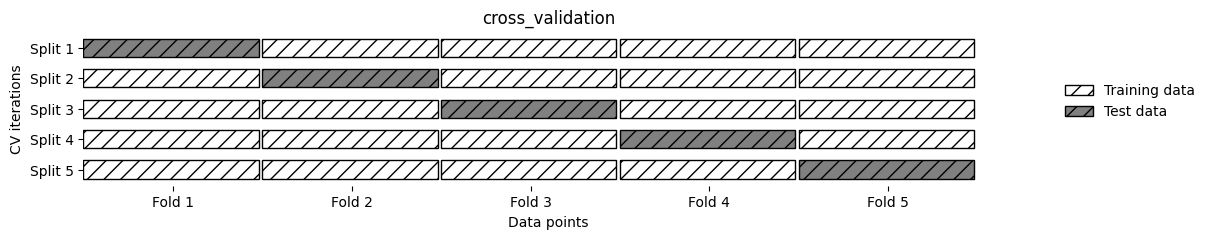

In [4]:
import mglearn
mglearn.plots.plot_cross_validation()
#Пример того как работает кросс-валидация!

<h5>Кросс-валидация на датасете digits</h5>

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=10000)
scores = cross_val_score(lg, digits.data, digits.target)
print("Cross-validation : {}".format(scores))

Cross-validation : [0.925      0.875      0.93871866 0.93314763 0.89693593]


In [7]:
print("Средняя правильность: {}".format(scores.mean()))

Средняя правильность: 0.9137604456824512


<h6>Оценка работы</h6>

In [8]:
from sklearn.model_selection import cross_validate
res = cross_validate(lg, digits.data, digits.target, cv=5,return_train_score=True)
display(res)


{'fit_time': array([2.20526981, 2.50087309, 1.35716367, 1.15430307, 1.24148774]),
 'score_time': array([0.00054216, 0.00037599, 0.00038505, 0.00035405, 0.00034308]),
 'test_score': array([0.925     , 0.875     , 0.93871866, 0.93314763, 0.89693593]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [9]:
res_df = pd.DataFrame(res)
display(res_df)
print("Mean {}".format(res_df.mean()))

,fit_time,score_time,test_score,train_score
0,2.205270,0.000542,0.925000,1.0
1,2.500873,0.000376,0.875000,1.0
2,1.357164,0.000385,0.938719,1.0
3,1.154303,0.000354,0.933148,1.0
4,1.241488,0.000343,0.896936,1.0


Mean fit_time       1.691819
score_time     0.000400
test_score     0.913760
train_score    1.000000
dtype: float64


<h5>Решетчатый поиск</h5>

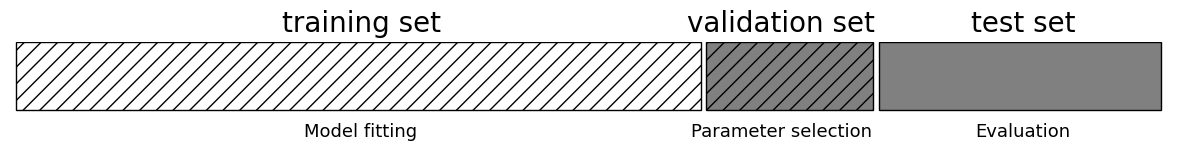

In [10]:
mglearn.plots.plot_threefold_split()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
# разбиваем данные на обучающий+проверочный набор и тестовый набор 
X_trainval, X_test, y_trainval, y_test = train_test_split(digits.data,digits.target, random_state=0) 
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы 
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1) 
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])) 

best_score = 0 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:     
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:         
        # для каждой комбинации параметров обучаем SVC         
        svm = SVC(gamma=gamma, C=C)         
        svm.fit(X_train, y_train)         
        # оцениваем качество SVC на тестовом наборе         
        score = svm.score(X_valid, y_valid)         
        # если получаем наилучшее значение правильности, сохраняем значение и параметры 
        if score > best_score:             
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 
# заново строим модель на наборе, полученном в результате объединения обучающих
# и проверочных данных, оцениваем качество модели на тестовом наборе 
svm = SVC(**best_parameters) 
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score)) 

Размер обучающего набора: 1010 размер проверочного набора: 337 размер тестового набора: 450
Лучшее значение правильности на проверочном наборе: 0.99
Наилучшие значения параметров:  {'C': 1, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 1.00


<h6>Метрика модели</h6>

In [12]:
y= digits.target == 9
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=0)

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе {:.2f}".format(tree.score(X_test, y_test)))


Правильность на тестовом наборе 0.92


<h5>Создание модели классификатора</h5>

<h6>1)Создание собственного датасета!</h6>

In [14]:
import pandas as pd
import random

def generate_random_data():
    salary = random.randint(30000, 1000000)
    cities = ['Bishkek', 'Osh', 'Kara-kol', 'Jalal-Abad', 'Talas', 'Tokmok']
    city = random.choice(cities)
    age = random.randint(18, 65)
    vacation_preferences = ['Beach', 'Mountain', 'City']
    vacation_prefer = random.choice(vacation_preferences)
    transport_preferences = ['Car', 'Public Transport', 'Bicycle']
    transport_prefer = random.choice(transport_preferences)
    target = random.choice([0, 1])  # Assuming binary classification

    return salary, city, age, vacation_prefer, transport_prefer, target

data = [generate_random_data() for _ in range(10000)]

columns = ['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target']
df = pd.DataFrame(data, columns=columns)

print(df.head(20))


    salary        city  age vacation_prefer  transport_prefer  target
0   121980      Tokmok   32        Mountain               Car       1
1   981211         Osh   46           Beach  Public Transport       0
2   822792       Talas   38           Beach               Car       1
3   132475  Jalal-Abad   59           Beach               Car       0
4   264950  Jalal-Abad   65        Mountain               Car       1
5   424045         Osh   64            City               Car       0
6   793092  Jalal-Abad   38            City           Bicycle       1
7   577120         Osh   26            City           Bicycle       0
8   800005         Osh   18            City  Public Transport       1
9    45116      Tokmok   26           Beach  Public Transport       0
10  662979  Jalal-Abad   60           Beach               Car       1
11  142308  Jalal-Abad   65           Beach               Car       0
12  597364  Jalal-Abad   57        Mountain           Bicycle       1
13  916197  Jalal-Ab

2)Преобразование категориальные данные в числовые, используя panadas.get_dummies.

In [15]:
df_encoded = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])

# Вывод первых 20 строк!
print(df_encoded.head(20))


    salary  age  target  city_Bishkek  city_Jalal-Abad  city_Kara-kol  \
0   121980   32       1         False            False          False   
1   981211   46       0         False            False          False   
2   822792   38       1         False            False          False   
3   132475   59       0         False             True          False   
4   264950   65       1         False             True          False   
5   424045   64       0         False            False          False   
6   793092   38       1         False             True          False   
7   577120   26       0         False            False          False   
8   800005   18       1         False            False          False   
9    45116   26       0         False            False          False   
10  662979   60       1         False             True          False   
11  142308   65       0         False             True          False   
12  597364   57       1         False             T

In [16]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (800, 14)
Shape of X_test: (200, 14)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model on the training set
random_forest.fit(X_train, y_train)

# Calculate and print the accuracy on the training and test datasets
train_accuracy_rf = random_forest.score(X_train, y_train)
test_accuracy_rf = random_forest.score(X_test, y_test)

print(f"Accuracy on the training dataset (Random Forest): {train_accuracy_rf}")
print(f"Accuracy on the test dataset (Random Forest): {test_accuracy_rf}")


Accuracy on the training dataset (Random Forest): 1.0
Accuracy on the test dataset (Random Forest): 0.5


<h6>Улучшение нашего предсказания!</h6>

In [18]:
scores = cross_val_score(random_forest, df_encoded.salary, df_encoded.target)
print("Кросс валидация {}".format(scores))

Кросс валидация: [0.49  0.465 0.525 0.545 0.495]


In [19]:
print("Средняя правильность : {:.3f}".format(scores.mean()))

Средняя правильность : 0.504


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

# Split the data into training+validation set and test set 
X_trainval, X_test, y_trainval, y_test = train_test_split(df_encoded.drop('target', axis=1), df_encoded['target'], random_state=0)

# Further split the training+validation set into training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])) 

best_score = 0 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:     
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:         
        # For each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)         
        svm.fit(X_train, y_train)         
        # Evaluate the performance of SVC on the validation set         
        score = svm.score(X_valid, y_valid)         
        # If the current model performs better, store the parameters 
        if score > best_score:             
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 

# Rebuild the model using the combined training and validation data 
svm = SVC(**best_parameters) 
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 

print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score)) 


Размер обучающего набора: 562 размер проверочного набора: 188 размер тестового набора: 250
Лучшее значение правильности на проверочном наборе: 0.52
Наилучшие значения параметров:  {'C': 1, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.48


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming df_encoded is your encoded DataFrame
# Specify features (X) and target variable (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target'] == 9  # Convert to boolean

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a DecisionTreeClassifier and fit it to the training data
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

# Make predictions on the test set
pred_tree = tree.predict(X_test)

# Evaluate the model
accuracy = tree.score(X_test, y_test)
print("Accuracy on the test set: {:.2f}".format(accuracy))


Accuracy on the test set: 1.00


In [22]:
param_grid = {'C':[0.001,0.01, 0.1,1,10,100],
              'gamma':[
                  0.001,0.01, 0.1,1,10,100
              ]}
print("Сетка параметров: {}".format(param_grid))

Сетка параметров: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [24]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Define the parameter grid for the grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [25]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [26]:
print(grid_search.score(X_test, y_test))

0.484


<h5>В процессе изучения данного кода я освоил методы оценки и улучшения моделей машинного обучения. Кросс-валидация представляется надежным методом для оценки обобщающей способности моделей, а решетчатый поиск параметров дает возможность тонкой настройки модели для достижения наилучших результатов.

Пример использования этих методов на датасете с изображениями цифр и собственном датасете с категориальными признаками позволил мне лучше понять их применение на практике. Важным шагом является предобработка данных, включая кодирование категориальных признаков, что влияет на эффективность обучения моделей.

Оценка моделей по точности и использование различных алгоритмов (логистическая регрессия, SVM, случайный лес) демонстрируют вариативность подходов в зависимости от конкретных требований и характеристик данных.

С учетом полученного опыта, я планирую применять эти методы в своих будущих проектах для более эффективного и точного построения моделей машинного обучения.</h5>